In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils_all import *
%matplotlib inline


/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


http://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

In [2]:
%store -r data

In [3]:
data_cl = clean_df(data)

In [4]:
num_features = ['x_coords','y_coords']

data_cl = data_cl.dropna(axis=0)
data_num = data_cl[num_features]
data_num = data_num[data_num.applymap(lambda x: isinstance(x, (int, float)))]
data_cl[num_features] = data_num
data_cl = data_cl.dropna(axis=0)

In [11]:
data_xy = data_cl[['meta_name','x_coords','y_coords']]

In [15]:
smpl = data_xy.sample(5000)

In [16]:
nameXY = smpl[smpl.meta_name == 'name']

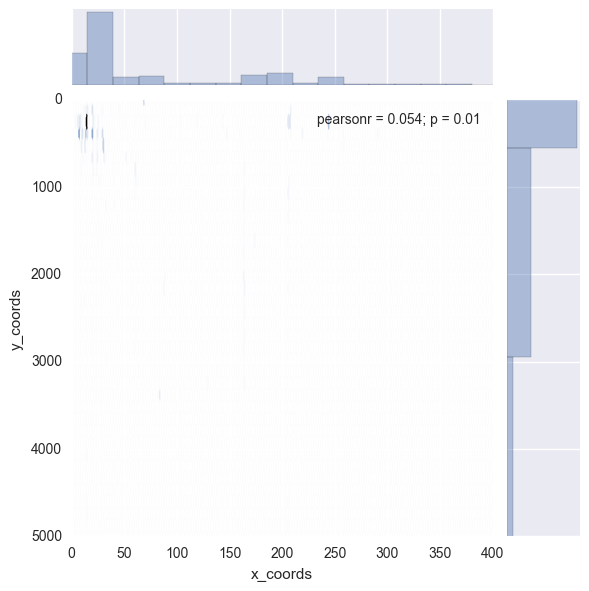

In [17]:
sns.jointplot(x=nameXY.x_coords, y=nameXY.y_coords, kind='hex', xlim=(0,400), ylim=(5000,0))

plt.show()

In [69]:
from matplotlib.pyplot import hist2d, xlim, ylim

In [79]:
smpl.head()

,meta_name,x_coords,y_coords
7076,startDate,126,399
7273,name,7,358
7594,description,15,493
7808,description,15,523
5893,name,15,3824


In [86]:
import matplotlib.ticker as ticker

In [109]:
def draw_hex(meta_name, df, ylim=(960,0), xlim=(0,1000)):
    dataXY = df[df.meta_name == meta_name]
    smpl = dataXY.sample(1000)
    g = sns.jointplot(x=smpl.x_coords, y=smpl.y_coords, kind='scatter', ylim=ylim, xlim=xlim)

    g.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
    g.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))

    plt.show()

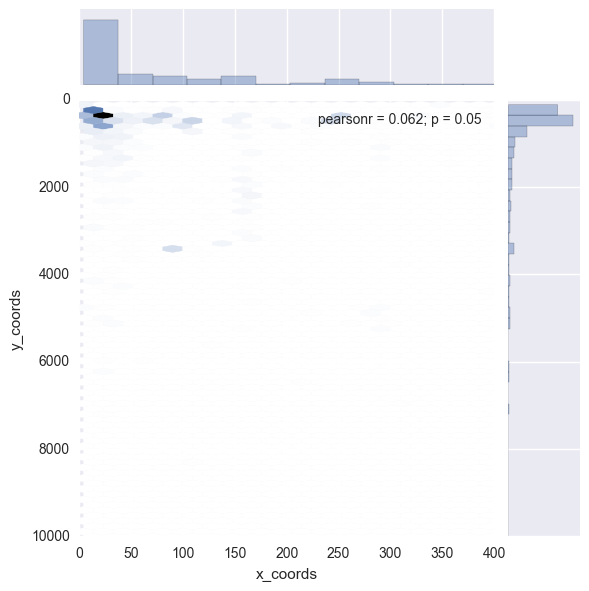

In [63]:
draw_hex('location', data_xy)

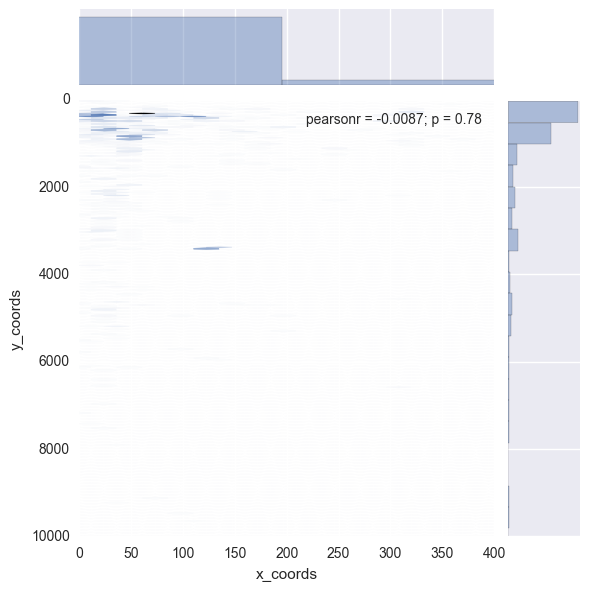

In [64]:
draw_hex('startDate', data_xy)

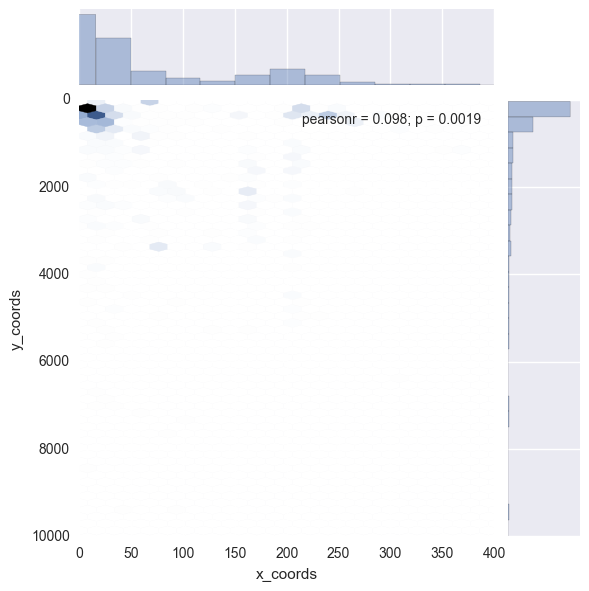

In [65]:
draw_hex('name', data_xy)

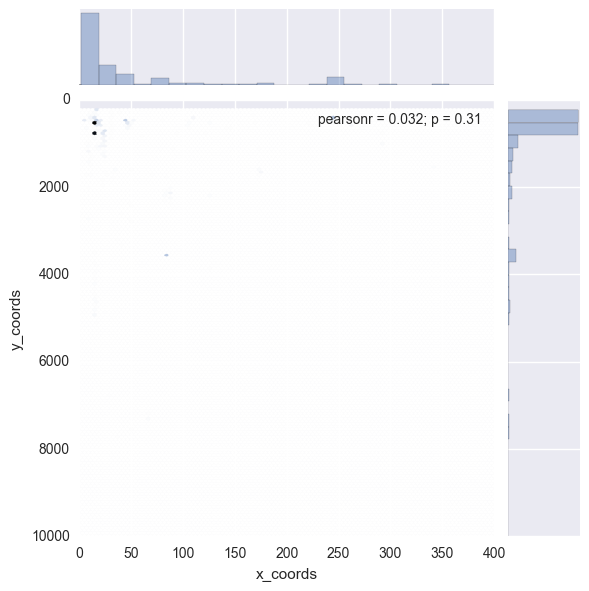

In [66]:
draw_hex('description', data_xy)

## The center of rectangule

In [52]:
data_rect = data_cl[['meta_name','x_coords','y_coords', 'block_height', 'block_width']]

In [53]:
data_rect['x1'] = data_rect.x_coords
data_rect['y1'] = data_rect.y_coords

In [54]:
data_rect['x2'] = data_rect.x_coords + data_rect.block_width
data_rect['y2'] = data_rect['y1']

In [55]:
data_rect['x3'] = data_rect['x1']
data_rect['y3'] = data_rect['y1'] + data_rect.block_height

In [56]:
data_rect['x4'] = data_rect['x3'] + data_rect.block_width
data_rect['y4'] = data_rect['y3']

In [68]:
data_block_centers = pd.DataFrame()
data_block_centers['x_coords'] = data_rect.x1 + (data_rect.x2 - data_rect.x1)/2
data_block_centers['y_coords'] = data_rect.y1 + (data_rect.y3 - data_rect.y1)/2
data_block_centers['meta_name'] = data_rect.meta_name

Dataframe with the centers of corresponding blocks

If the average web page size is 960 pixels and the average screen width is 1024 pixel
https://www.iteracy.com/blog/post/size-and-layout-of-a-web-page

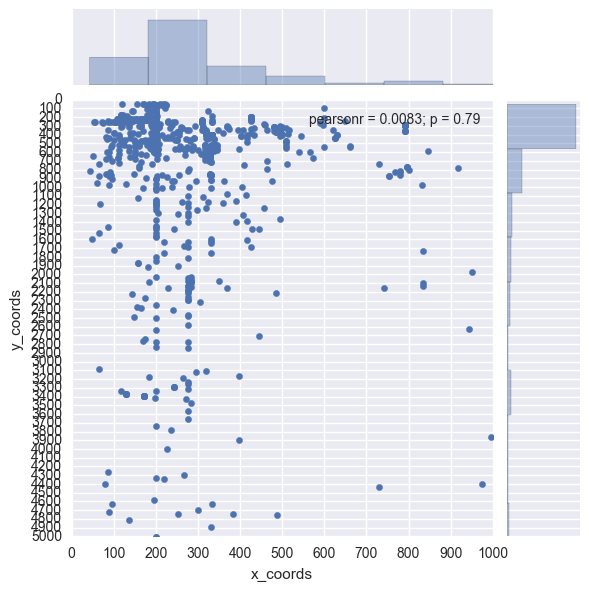

In [110]:
draw_hex('name', data_block_centers, ylim=(5000,0))

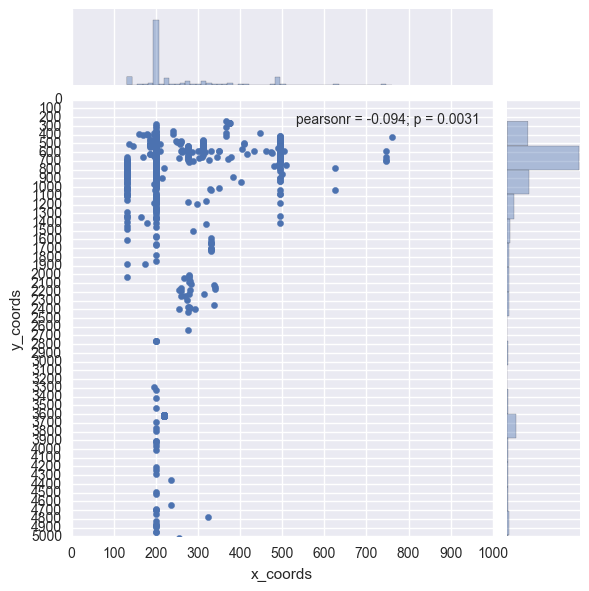

In [111]:
draw_hex('description', data_block_centers, ylim=(5000,0))

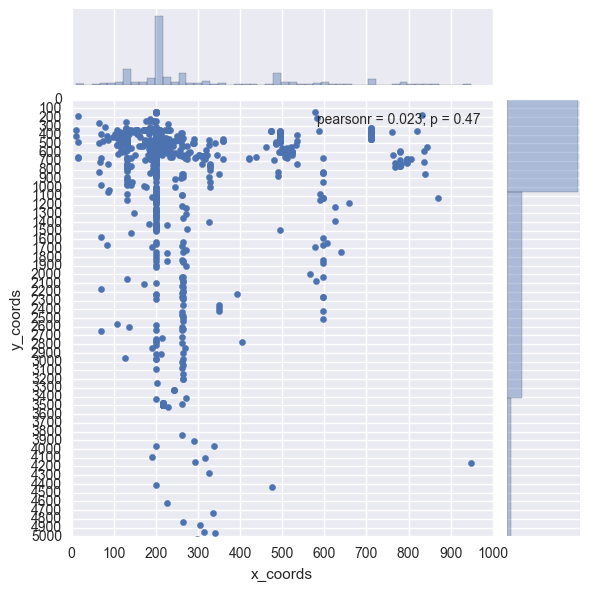

In [114]:
draw_hex('location', data_block_centers,  ylim=(5000,0))

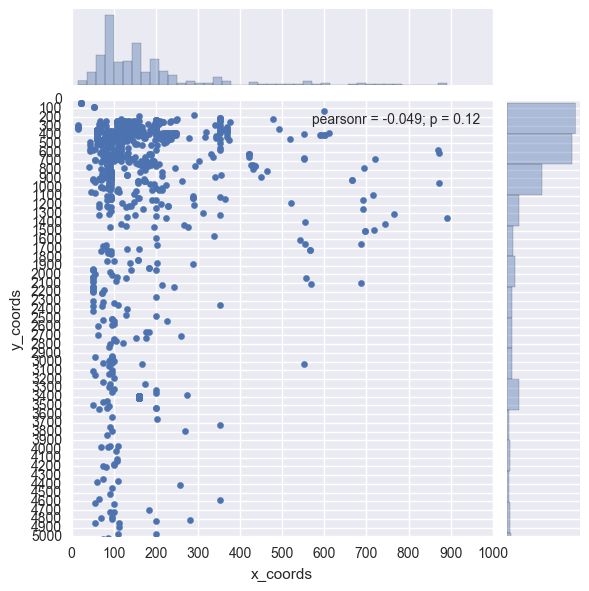

In [115]:
draw_hex('startDate', data_block_centers,  ylim=(5000,0))